In [2]:
%load_ext autoreload
%load_ext dotenv
%dotenv -o ../tests/.env.test
%aimport redbox
from redbox.app import Redbox
from redbox.graph.root import get_agentic_search_graph, get_self_route_graph, get_chat_with_documents_graph, get_chat_graph
from pathlib import Path
from dotenv import load_dotenv
from redbox.models.chain import RedboxQuery, RedboxState, AISettings
from uuid import uuid4, UUID

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
from redbox.chains.components import get_parameterised_retriever, get_all_chunks_retriever, get_metadata_retriever

from redbox.models.chain import PromptSet
from langchain_core.tools import StructuredTool
from redbox.graph.nodes.tools import (
    build_search_documents_tool,
    build_search_wikipedia_tool,
    build_govuk_search_tool,

)
from redbox.models.file import ChunkResolution
from redbox.models.settings import Settings
from redbox.graph.root import get_root_graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [17]:
app = Redbox()

In [ ]:
list(app.graph.get_graph().nodes['p_search_agentic'].data.get_graph().nodes.keys())

['__start__',
 'p_set_agentic_search_route',
 'p_search_agent',
 'p_retrieval_tools',
 'p_give_up_agent',
 'p_report_sources',
 'p_activity_log_retrieval_tool_calls',
 'd_x_steps_left_or_less',
 's_tool',
 '__end__']

In [18]:
app.graph.get_graph().nodes['p_chat_with_documents'].data.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'redbox.models.chain.RedboxState'>, metadata=None), 'p_pass_question_to_text': Node(id='p_pass_question_to_text', name='p_pass_question_to_text', data=RunnableLambda(_passthrough), metadata=None), 'p_set_chat_docs_route': Node(id='p_set_chat_docs_route', name='p_set_chat_docs_route', data=RunnableBinding(bound=RunnableLambda(_set_route), kwargs={}, config={'tags': ['route_flag']}, config_factories=[]), metadata=None), 'p_set_chat_docs_map_reduce_route': Node(id='p_set_chat_docs_map_reduce_route', name='p_set_chat_docs_map_reduce_route', data=RunnableBinding(bound=RunnableLambda(_set_route), kwargs={}, config={'tags': ['route_flag']}, config_factories=[]), metadata=None), 'p_summarise_each_document': Node(id='p_summarise_each_document', name='p_summarise_each_document', data=RunnableLambda(lambda left, right: combine_documents(left, right)), metadata=None), 'p_summarise_document_by_document': Node(id='p_summari

In [4]:
ENV = Settings()

In [5]:
def draw_graph(app):
    display(
    Image(
        app.get_graph(xray=True).draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Redbox top graph

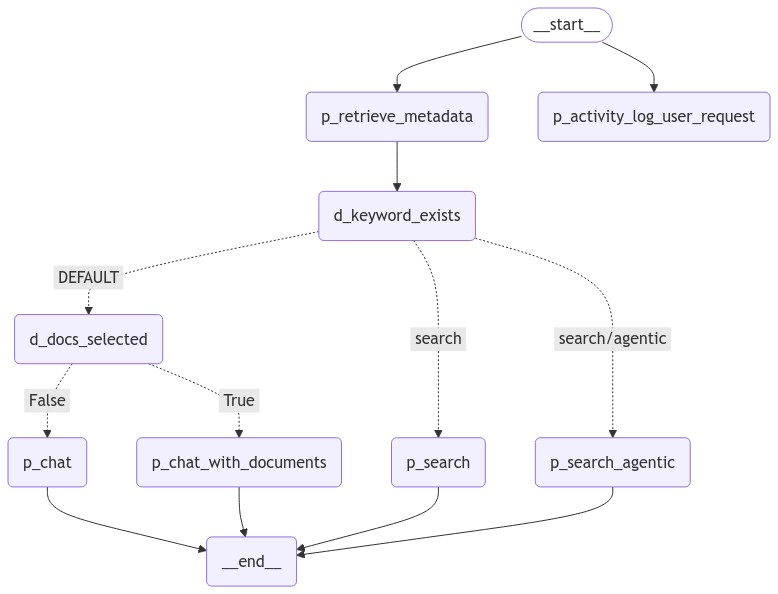

In [6]:
app = Redbox()
Image(app.graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,))

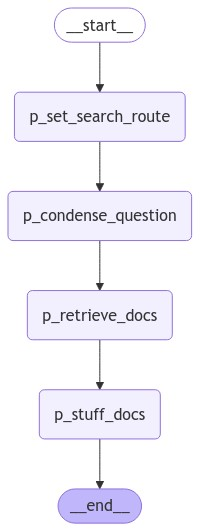

In [20]:
Image(app.graph.get_graph().nodes['p_search'].data.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,))

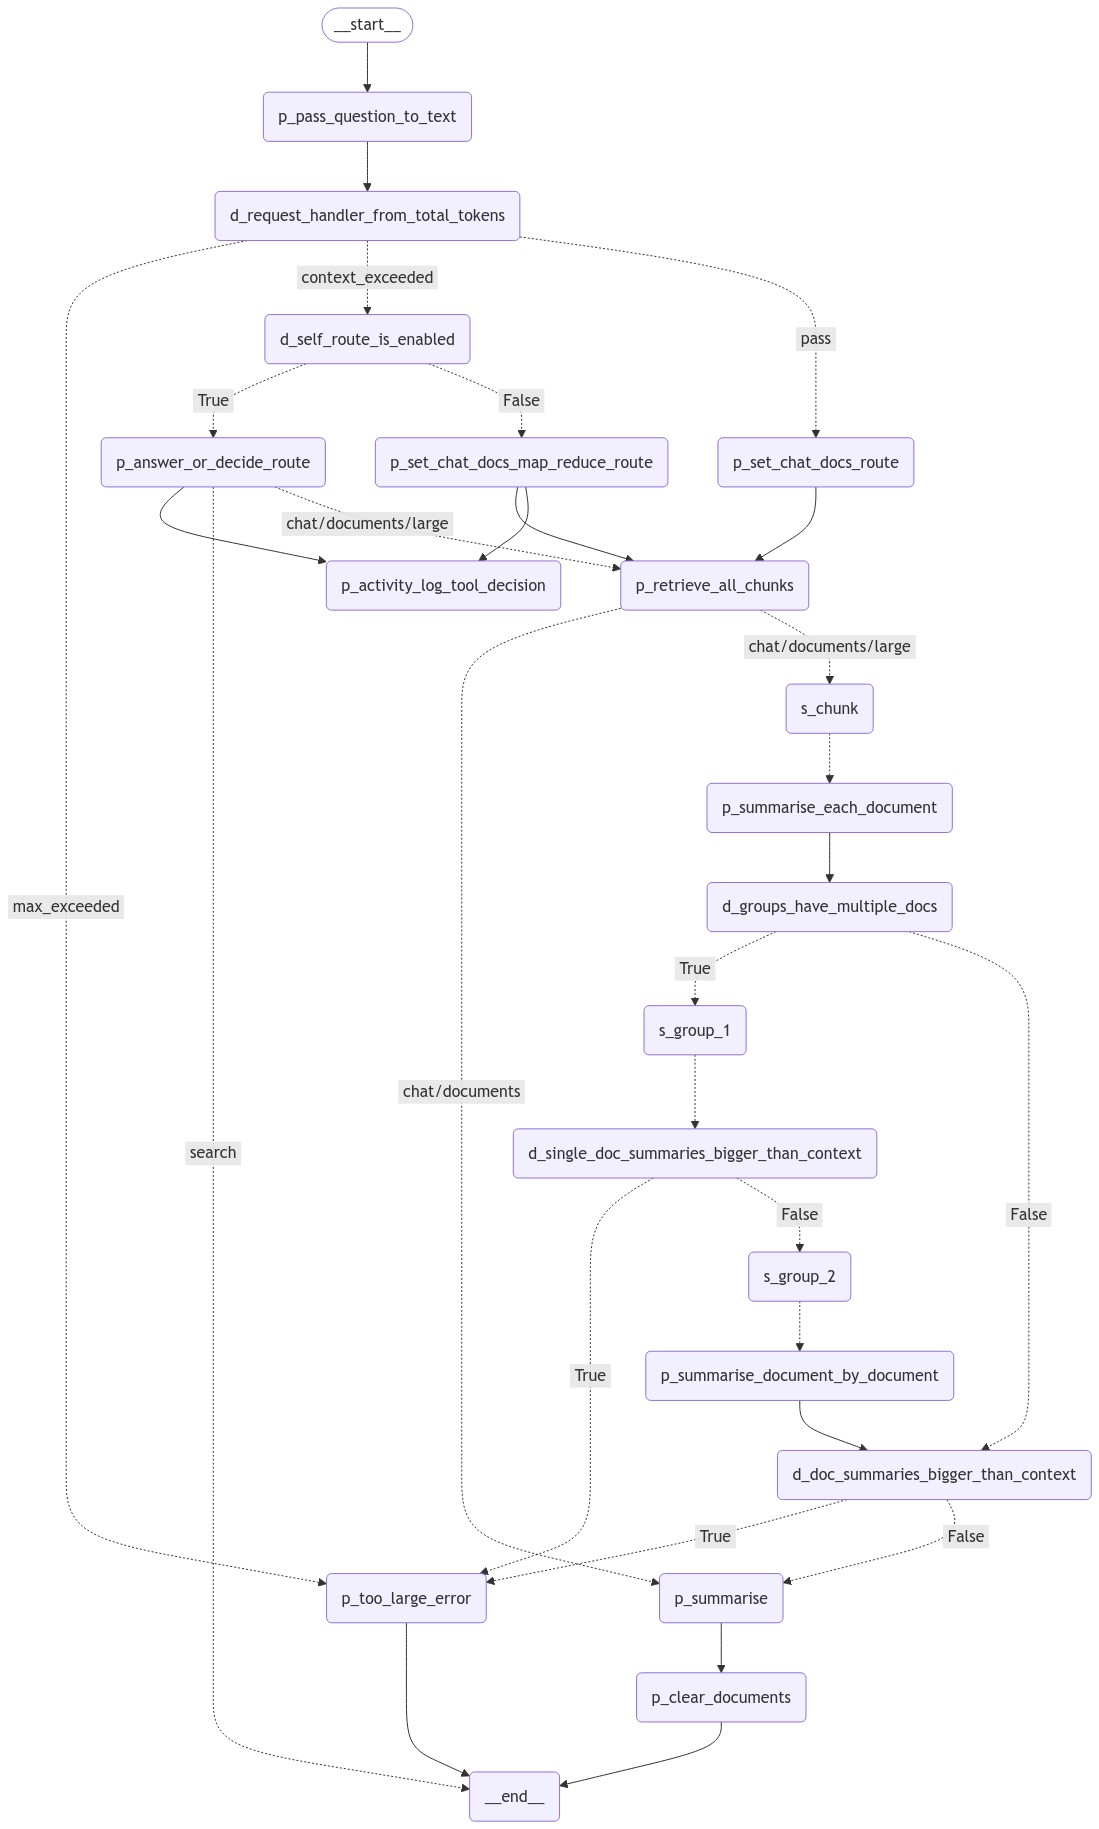

In [19]:
Image(app.graph.get_graph().nodes['p_chat_with_documents'].data.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,))

## Agentic search graph

In [10]:

search_documents = build_search_documents_tool(
            es_client=ENV.opensearch_client(),
            index_name=f"{ENV.elastic_root_index}-chunk",
            embedding_model=ENV.embedding_backend,
            embedding_field_name=ENV.embedding_document_field_name,
            chunk_resolution=ChunkResolution.normal,
        )
search_wikipedia = build_search_wikipedia_tool()

search_govuk = build_govuk_search_tool()

tools: dict[str, StructuredTool] = {
    "_search_documents": search_documents,
    "_search_govuk": search_govuk,
    "_search_wikipedia": search_wikipedia,
}

app = get_agentic_search_graph(tools=tools)

/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-py3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:547: UserWarning: typing.NotRequired is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-py3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:547: UserWarning: typing.NotRequired is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-p

In [21]:
list(app.nodes.keys())

['__start__',
 'p_set_agentic_search_route',
 'p_search_agent',
 'p_retrieval_tools',
 'p_stuff_docs_agent',
 'p_give_up_agent',
 'p_report_sources',
 'p_activity_log_retrieval_tool_calls',
 'd_x_steps_left_or_less',
 'd_tools_selected',
 'd_answer_or_give_up',
 's_tool']

/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-py3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:547: UserWarning: typing.Required is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-py3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:547: UserWarning: typing.NotRequired is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/Users/saisakulchernbumroong/Library/Caches/pypoetry/virtualenvs/redbox-PI4tBmjQ-py3.

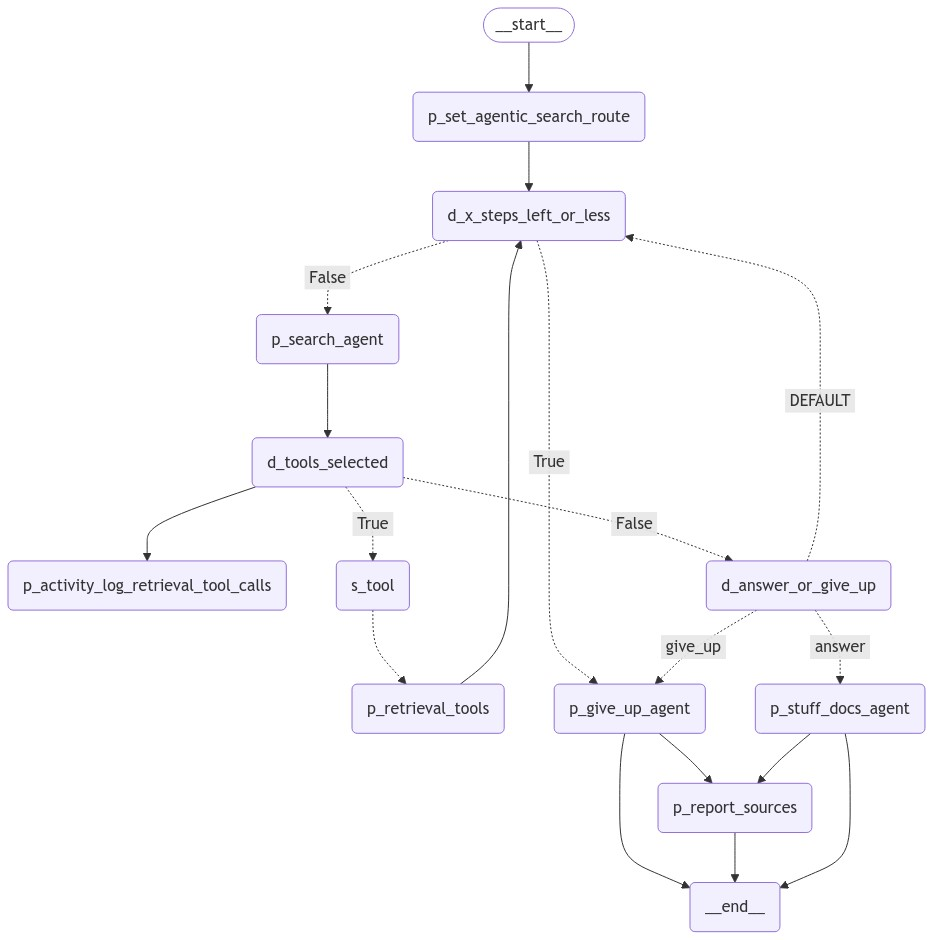

In [11]:
draw_graph(app)

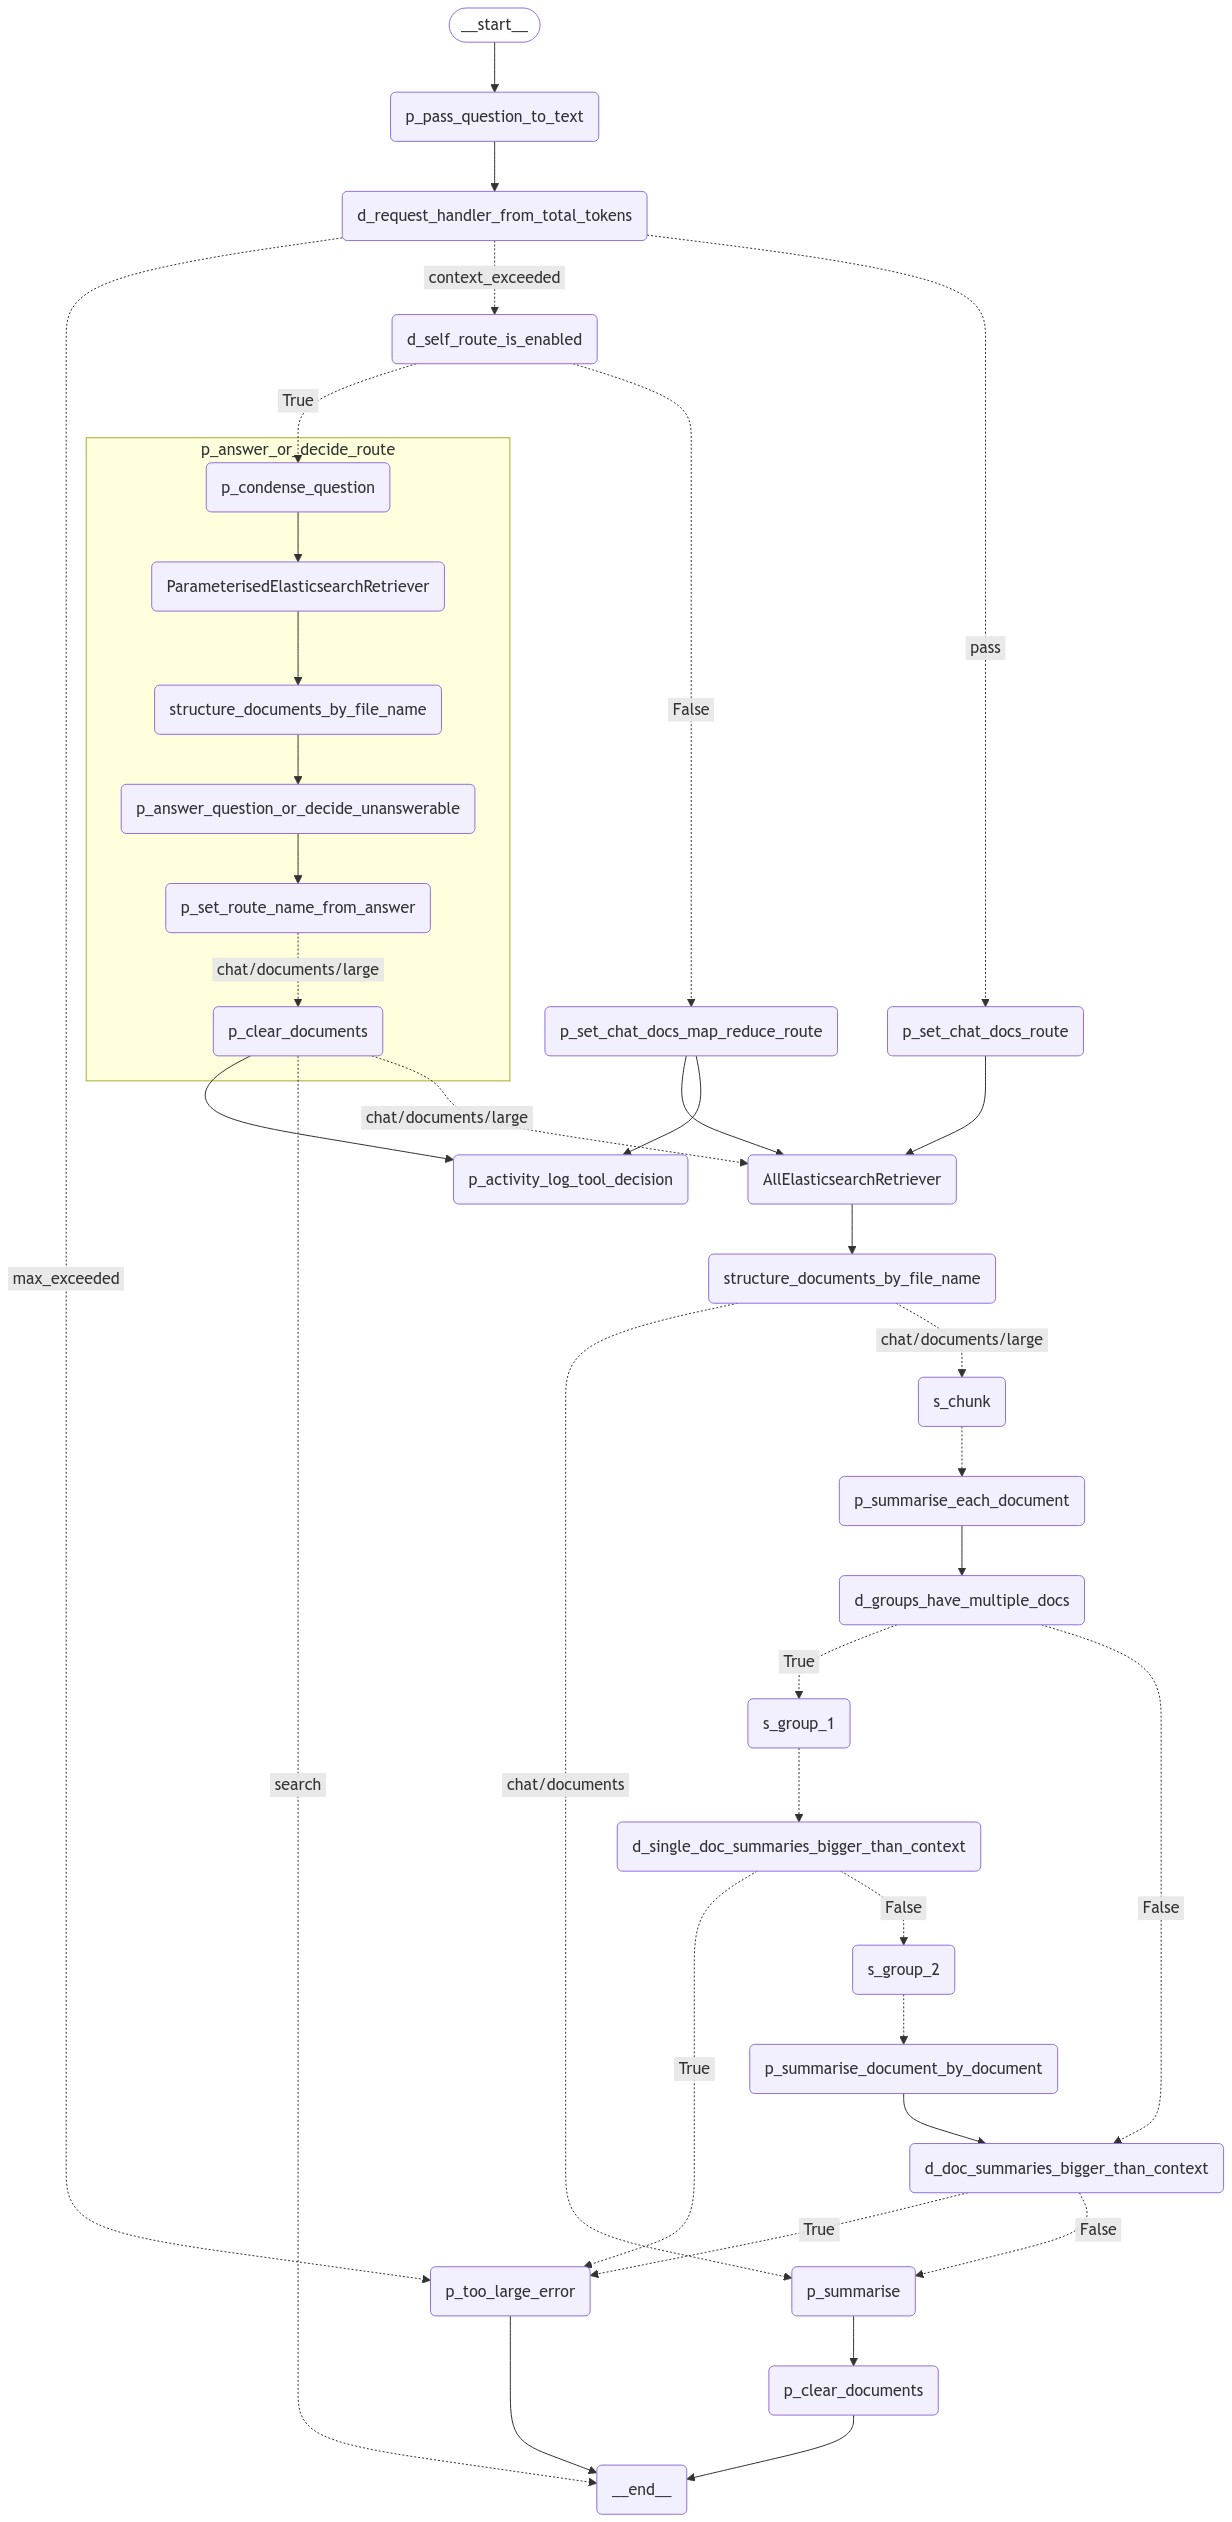

In [25]:
app = get_chat_with_documents_graph(get_all_chunks_retriever(ENV),get_parameterised_retriever(ENV))
draw_graph(app)

## Self route graph

In [26]:
app = get_self_route_graph(get_parameterised_retriever(ENV), PromptSet.SelfRoute)

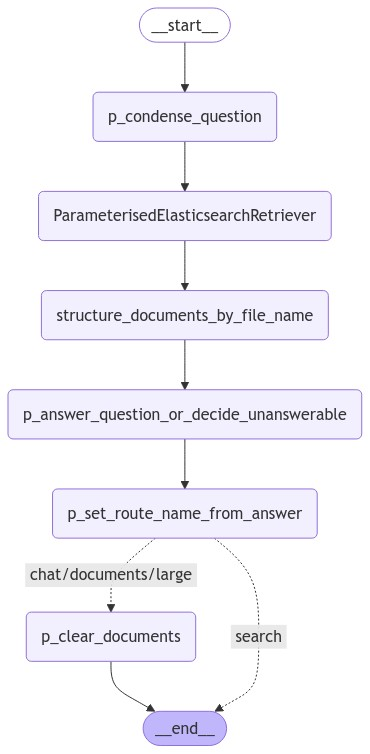

In [27]:
draw_graph(app)

In [22]:
app = get_root_graph(get_all_chunks_retriever(ENV),get_parameterised_retriever(ENV), get_metadata_retriever(ENV), tools)
# draw_graph(app)

In [24]:
app = get_chat_graph()

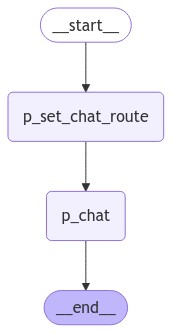

In [25]:
draw_graph(app)